In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [5]:
device

device(type='cuda')

Files already downloaded and verified
Files already downloaded and verified


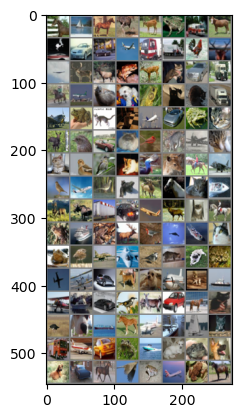

horse ship  horse bird  deer  frog  truck horse horse car   car   plane truck truck bird  deer  plane deer  deer  frog  deer  cat   car   truck horse plane cat   dog   frog  cat   cat   truck plane frog  cat   cat   plane car   frog  cat   deer  bird  car   cat   bird  cat   plane cat   cat   bird  bird  cat   bird  deer  horse plane bird  plane bird  frog  deer  horse cat   ship  deer  deer  truck car   plane deer  cat   horse frog  ship  frog  deer  bird  plane ship  cat   frog  bird  plane plane bird  cat   dog   frog  plane plane car   dog   dog   plane deer  ship  plane ship  car   bird  deer  car   horse cat   bird  dog   ship  horse plane ship  ship  cat   truck plane car   frog  ship  dog   frog  dog   dog   car   horse bird  frog  plane frog  horse


In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
batch_size = 128
trainset = torchvision.datasets.CIFAR10(
    root = './data', 
    train=True,
    download=True, 
    transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root = './data', 
    train=False,
    download=True, 
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size = batch_size, shuffle = True, num_workers=0
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size = batch_size, shuffle = False, num_workers=0
)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
class AlexNet(nn.Module):
    def __init__(self, num_classes = 10, dropout_rate = 0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size = 3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(96, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(256 * 2 * 2, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, num_classes),
        )
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [11]:
model = AlexNet(num_classes = 10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train(num_epoch = 10):
    for epoch in range(num_epoch):
        running_loss = 0.0
        for i, data in enumerate(trainloader,0):
            inputs,labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
    
            optimizer.zero_grad()
    
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss+=loss.item()
            if i % 100 == 99:
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
                running_loss = 0.0
    print("Done!")

train(25)

Epoch 1, Batch 100, Loss: 2.021
Epoch 1, Batch 200, Loss: 1.696
Epoch 1, Batch 300, Loss: 1.542
Epoch 2, Batch 100, Loss: 1.345
Epoch 2, Batch 200, Loss: 1.294
Epoch 2, Batch 300, Loss: 1.207
Epoch 3, Batch 100, Loss: 1.085
Epoch 3, Batch 200, Loss: 1.059
Epoch 3, Batch 300, Loss: 1.047
Epoch 4, Batch 100, Loss: 0.928
Epoch 4, Batch 200, Loss: 0.926
Epoch 4, Batch 300, Loss: 0.895
Epoch 5, Batch 100, Loss: 0.799
Epoch 5, Batch 200, Loss: 0.792
Epoch 5, Batch 300, Loss: 0.813
Epoch 6, Batch 100, Loss: 0.692
Epoch 6, Batch 200, Loss: 0.713
Epoch 6, Batch 300, Loss: 0.719
Epoch 7, Batch 100, Loss: 0.620
Epoch 7, Batch 200, Loss: 0.634
Epoch 7, Batch 300, Loss: 0.634
Epoch 8, Batch 100, Loss: 0.523
Epoch 8, Batch 200, Loss: 0.545
Epoch 8, Batch 300, Loss: 0.575
Epoch 9, Batch 100, Loss: 0.447
Epoch 9, Batch 200, Loss: 0.487
Epoch 9, Batch 300, Loss: 0.491
Epoch 10, Batch 100, Loss: 0.392
Epoch 10, Batch 200, Loss: 0.456
Epoch 10, Batch 300, Loss: 0.456
Epoch 11, Batch 100, Loss: 0.347
Epoc

In [12]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for data in testloader:
        images,labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, preds = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
print(f'Accuracy on test images: {100 * correct / total:.2f}%')

Accuracy on test images: 71.16%
